#  ***Predicting Crime Trends & Identifying High-Risk Areas Using Machine Learning***






# **1.  Goal of the Project**





Understanding crime patterns, predicting future crime occurrences, and identifying high-risk areas are crucial for effective crime prevention and law enforcement resource allocation.
This project aims to analyze crime data  using EDA and ML to uncover patterns, predict crime trends, and provide actionable insight

# **2. Data Story/Source**

Crime Data from 2020 to Present (Uploaded CSV File) from Open government crime databases

Link : https://catalog.data.gov/dataset/crime-data-from-2020-to-present

**Dataset Description**

* Dataset contains 1005104 rows and 28 columns.

* dtypes: float64(8), int64(7), object(13)


**Tool Used**

pandas,numpy,seaborn,matplotlib.pyplot

LogisticRegression,classification_report,confusion_matrix,accuracy_score

train_test_split,LabelEncoder

 RandomForestClassifier

# **Understanding Data**

In [3]:
#importing the needed libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#loading the data set
df = pd.read_csv('/content/Crime_Data_from_2020_to_Present.csv')
df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,200412582,09/09/2020 12:00:00 AM,09/09/2020 12:00:00 AM,630,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E AVENUE 28,NaN,34.0820,-118.2130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005099,250304184,02/18/2025 12:00:00 AM,02/14/2025 12:00:00 AM,1200,3,Southwest,328,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,700 W 28TH ST,NaN,34.0270,-118.2794
1005100,252104053,01/19/2025 12:00:00 AM,01/17/2025 12:00:00 AM,1530,21,Topanga,2114,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",...,IC,Invest Cont,341.0,NaN,NaN,NaN,22200 ELKWOOD ST,NaN,34.2128,-118.6103
1005101,250304214,02/23/2025 12:00:00 AM,02/21/2025 12:00:00 AM,1530,3,Southwest,358,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,3600 MCCLINTOCK AV,NaN,34.0212,-118.2895
1005102,250304203,02/20/2025 12:00:00 AM,02/13/2025 12:00:00 AM,2100,3,Southwest,325,1,522,"VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, B...",...,IC,Invest Cont,522.0,NaN,NaN,NaN,2600 ELLENDALE PL,NaN,34.0307,-118.2923


In [5]:
# Check the shape of the dataset
print(f'Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.')

Dataset contains 1005104 rows and 28 columns.


    The rows and columns of the dataset

In [6]:
df.info() #to take the information of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005104 entries, 0 to 1005103
Data columns (total 28 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   DR_NO           1005104 non-null  int64  
 1   Date Rptd       1005104 non-null  object 
 2   DATE OCC        1005104 non-null  object 
 3   TIME OCC        1005104 non-null  int64  
 4   AREA            1005104 non-null  int64  
 5   AREA NAME       1005104 non-null  object 
 6   Rpt Dist No     1005104 non-null  int64  
 7   Part 1-2        1005104 non-null  int64  
 8   Crm Cd          1005104 non-null  int64  
 9   Crm Cd Desc     1005104 non-null  object 
 10  Mocodes         853380 non-null   object 
 11  Vict Age        1005104 non-null  int64  
 12  Vict Sex        860353 non-null   object 
 13  Vict Descent    860341 non-null   object 
 14  Premis Cd       1005088 non-null  float64
 15  Premis Desc     1004516 non-null  object 
 16  Weapon Used Cd  327244 non-null   fl

    Checking the information of the dataset
    

In [7]:
df.head(5) #displaying the first five rows of the table for just analysing

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,200412582,09/09/2020 12:00:00 AM,09/09/2020 12:00:00 AM,630,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E AVENUE 28,NaN,34.0820,-118.2130


In [8]:
df.tail(5) #displaying last 5 rows for just analysing

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
1005099,250304184,02/18/2025 12:00:00 AM,02/14/2025 12:00:00 AM,1200,3,Southwest,328,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,700 W 28TH ST,NaN,34.0270,-118.2794
1005100,252104053,01/19/2025 12:00:00 AM,01/17/2025 12:00:00 AM,1530,21,Topanga,2114,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",...,IC,Invest Cont,341.0,NaN,NaN,NaN,22200 ELKWOOD ST,NaN,34.2128,-118.6103
1005101,250304214,02/23/2025 12:00:00 AM,02/21/2025 12:00:00 AM,1530,3,Southwest,358,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,3600 MCCLINTOCK AV,NaN,34.0212,-118.2895
1005102,250304203,02/20/2025 12:00:00 AM,02/13/2025 12:00:00 AM,2100,3,Southwest,325,1,522,"VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, B...",...,IC,Invest Cont,522.0,NaN,NaN,NaN,2600 ELLENDALE PL,NaN,34.0307,-118.2923
1005103,250504051,01/14/2025 12:00:00 AM,01/14/2025 12:00:00 AM,1250,5,Harbor,509,1,210,ROBBERY,...,IC,Invest Cont,210.0,NaN,NaN,NaN,24300 WESTERN AV,NaN,33.8046,-118.3074


# **Cleaning Data**

In [9]:
df.duplicated().sum() #checking for duplicate values

np.int64(0)

    Hence i checked for duplicates and there is no duplicates in this dataset

In [10]:
df.isnull().sum() #taking the count of null values in each column

,0
DR_NO,0
Date Rptd,0
DATE OCC,0
TIME OCC,0
AREA,0
AREA NAME,0
Rpt Dist No,0
Part 1-2,0
Crm Cd,0
Crm Cd Desc,0


    checked for null values and found that some columns have more than 50% of null values

In [11]:
 #dropping columns with null values > than 750000
df = df.drop(columns = [column for column in df.columns if df[column].isnull().sum() > 600000])

    Dropped the columns that have null values more than 6 lakh

In [12]:
df.info() #checking the info of the data after dropping columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005104 entries, 0 to 1005103
Data columns (total 22 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   DR_NO         1005104 non-null  int64  
 1   Date Rptd     1005104 non-null  object 
 2   DATE OCC      1005104 non-null  object 
 3   TIME OCC      1005104 non-null  int64  
 4   AREA          1005104 non-null  int64  
 5   AREA NAME     1005104 non-null  object 
 6   Rpt Dist No   1005104 non-null  int64  
 7   Part 1-2      1005104 non-null  int64  
 8   Crm Cd        1005104 non-null  int64  
 9   Crm Cd Desc   1005104 non-null  object 
 10  Mocodes       853380 non-null   object 
 11  Vict Age      1005104 non-null  int64  
 12  Vict Sex      860353 non-null   object 
 13  Vict Descent  860341 non-null   object 
 14  Premis Cd     1005088 non-null  float64
 15  Premis Desc   1004516 non-null  object 
 16  Status        1005103 non-null  object 
 17  Status Desc   1005104 non-n

    Checking the information after dropping the columns

In [13]:
df.isnull().sum() #taking the sum of nul values in each column

,0
DR_NO,0
Date Rptd,0
DATE OCC,0
TIME OCC,0
AREA,0
AREA NAME,0
Rpt Dist No,0
Part 1-2,0
Crm Cd,0
Crm Cd Desc,0


    rechecking null value counts for doing needfull for the dataset

In [14]:
df = df.drop(columns = ["Mocodes"]) #through examine i made decion its not needed so dropping Mocodes column

    Dropped the column mocodes because there is no role for this column in this prediction
    

In [15]:

df = df.drop(columns = ["Part 1-2"]) #through examine i made decion its not needed so dropping Part 1-2 column

    through examine i made decion because it have no relation for predicting its not needed so dropped Part 1-2 column

In [16]:
df['Rpt Dist No'].value_counts() #checking the value counts of crosstreet column

,count
Rpt Dist No,
162,5403
1494,5369
645,5025
182,4896
646,4426
...,...
1048,1
704,1
1784,1


    retreving the value counts in the columnn reported district number for making decision based on the column

In [17]:
df['Vict Sex'].value_counts()

,count
Vict Sex,
M,403889
F,358575
X,97774
H,114
-,1


    retreving the value counts in the columnn vict sex for making decision based on the column

In [18]:
# for easy understanding rename values in the status column to the full form of the previous values
# Define a dictionary for mapping status codes
status_mapping = {
    "IC": "Investigation Continued",
    "AO": "Arrested - Other",
    "AA": "Arrested - Adult",
    "JA": "Arrested - Juvenile",
    "JO": "Arrested - Juvenile Other",
    "CC": "Case Closed"
}

# Apply mapping to dataset
df["Status_Description"] = df["Status"].map(status_mapping)

# Display updated dataset with descriptions
print(df[["Status", "Status_Description"]].head())


  Status       Status_Description
0     AA         Arrested - Adult
1     IC  Investigation Continued
2     IC  Investigation Continued
3     IC  Investigation Continued
4     IC  Investigation Continued


    Done the process mapping for the status column for understanding the values in column

In [19]:
#for easy understanding rename values in the descent column to the full form of the previous values
# Define mapping dictionary
descent_mapping = {
    "W": "White",
    "B": "Black",
    "H": "Hispanic",
    "A": "Asian",
    "N": "Native American",
    "P": "Pacific Islander",
    "O": "Other",
    "X": "Unknown"
}

# Apply mapping
df["Vict Descent"] = df["Vict Descent"].map(descent_mapping)

# Display updated dataset
print(df[["Vict Descent"]].head())


  Vict Descent
0        Other
1        Other
2      Unknown
3        Other
4          NaN


    Done the process mapping for the descent column for understanding the values in column

In [20]:
df.head(5)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Vict Age,...,Vict Descent,Premis Cd,Premis Desc,Status,Status Desc,Crm Cd 1,LOCATION,LAT,LON,Status_Description
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,510,VEHICLE - STOLEN,0,...,Other,101.0,STREET,AA,Adult Arrest,510.0,1900 S LONGWOOD AV,34.0375,-118.3506,Arrested - Adult
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,330,BURGLARY FROM VEHICLE,47,...,Other,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),IC,Invest Cont,330.0,1000 S FLOWER ST,34.0444,-118.2628,Investigation Continued
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,480,BIKE - STOLEN,19,...,Unknown,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,480.0,1400 W 37TH ST,34.0210,-118.3002,Investigation Continued
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,...,Other,405.0,CLOTHING STORE,IC,Invest Cont,343.0,14000 RIVERSIDE DR,34.1576,-118.4387,Investigation Continued
4,200412582,09/09/2020 12:00:00 AM,09/09/2020 12:00:00 AM,630,4,Hollenbeck,413,510,VEHICLE - STOLEN,0,...,NaN,101.0,STREET,IC,Invest Cont,510.0,200 E AVENUE 28,34.0820,-118.2130,Investigation Continued


    Checking the dataset that the mapping are applied


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005104 entries, 0 to 1005103
Data columns (total 21 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   DR_NO               1005104 non-null  int64  
 1   Date Rptd           1005104 non-null  object 
 2   DATE OCC            1005104 non-null  object 
 3   TIME OCC            1005104 non-null  int64  
 4   AREA                1005104 non-null  int64  
 5   AREA NAME           1005104 non-null  object 
 6   Rpt Dist No         1005104 non-null  int64  
 7   Crm Cd              1005104 non-null  int64  
 8   Crm Cd Desc         1005104 non-null  object 
 9   Vict Age            1005104 non-null  int64  
 10  Vict Sex            860353 non-null   object 
 11  Vict Descent        839985 non-null   object 
 12  Premis Cd           1005088 non-null  float64
 13  Premis Desc         1004516 non-null  object 
 14  Status              1005103 non-null  object 
 15  Status Desc    

In [22]:
#rnaming the columns
df.rename(columns={'Date Rptd': 'Date_Reported', 'DATE OCC': 'Date_Occurred', 'TIME OCC': 'Time_Occurred', 'AREA': 'Area_Code', 'AREA NAME': 'Area_Name', 'Rpt Dist No': 'Reporting_District_Number','LOCATION':'Location','Crm Cd':'Crime_code','Crm Cd 1': 'Crime_Code', 'Crm Cd 2': 'Crime_Code_2', 'Crm Cd 3': 'Crime_Code_3','Crm Cd Desc': 'Crime_Type','Vict Age': 'Victim_Age','Vict Sex': 'Victim_Sex','Vict Descent': 'Victim_Racial_Stage','Premis Cd': 'location_Code','Premis Desc': 'Area_type','Weapon Desc': 'Weapon_Type','Status Desc': 'Status_','LAT': 'Latitude','LON': 'Longitude','Weapon Used Cd':'Weapon_Code','Status_Description':'Status_of_Case'}, inplace=True)



    Renamed the columns from short froms to understamnding column labels

In [23]:
#droping the similar columns
# df = df.drop(columns=['Status'])
# df = df.drop(columns=['Status_'])
# df = df.drop(columns = ['Weapon_Code'])
# df = df.drop(columns=['Weapon_Type'])

In [24]:
df.head(5)

,DR_NO,Date_Reported,Date_Occurred,Time_Occurred,Area_Code,Area_Name,Reporting_District_Number,Crime_code,Crime_Type,Victim_Age,...,Victim_Racial_Stage,location_Code,Area_type,Status,Status_,Crime_Code,Location,Latitude,Longitude,Status_of_Case
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,510,VEHICLE - STOLEN,0,...,Other,101.0,STREET,AA,Adult Arrest,510.0,1900 S LONGWOOD AV,34.0375,-118.3506,Arrested - Adult
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,330,BURGLARY FROM VEHICLE,47,...,Other,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),IC,Invest Cont,330.0,1000 S FLOWER ST,34.0444,-118.2628,Investigation Continued
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,480,BIKE - STOLEN,19,...,Unknown,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,480.0,1400 W 37TH ST,34.0210,-118.3002,Investigation Continued
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,...,Other,405.0,CLOTHING STORE,IC,Invest Cont,343.0,14000 RIVERSIDE DR,34.1576,-118.4387,Investigation Continued
4,200412582,09/09/2020 12:00:00 AM,09/09/2020 12:00:00 AM,630,4,Hollenbeck,413,510,VEHICLE - STOLEN,0,...,NaN,101.0,STREET,IC,Invest Cont,510.0,200 E AVENUE 28,34.0820,-118.2130,Investigation Continued


    Chechked the dataset that the column names are changed correctly added after renaming them

In [25]:
df['Area_type'].value_counts()

,count
Area_type,
STREET,261356
SINGLE FAMILY DWELLING,163655
"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",119010
PARKING LOT,69155
OTHER BUSINESS,47648
...,...
DEPT OF DEFENSE FACILITY,2
HORSE RACING/SANTA ANITA PARK*,2
MTA - SILVER LINE - LAC/USC MEDICAL CENTER,2


    Checking the value counts for  knowing about the column "Area Type"

    After ckecking more we retrieves that mopre crimes are held on street

In [26]:
df['Victim_Racial_Stage'].value_counts()

,count
Victim_Racial_Stage,
Hispanic,296406
White,201447
Black,135818
Unknown,106685
Other,78002
Asian,21339
Pacific Islander,288


    Checking the value counts for knowing about the column "Victim Racial Status"

    We understand that most of the victim racila status is Hispanic's

In [27]:
df['Date_Occurred'].value_counts()

,count
Date_Occurred,
01/01/2020 12:00:00 AM,1164
01/01/2023 12:00:00 AM,1160
12/02/2022 12:00:00 AM,1132
02/01/2023 12:00:00 AM,1093
10/01/2022 12:00:00 AM,1079
...,...
02/28/2025 12:00:00 AM,1
01/07/2025 12:00:00 AM,1
02/23/2025 12:00:00 AM,1


    Checking the value counts for knowing about the column "Date Occurred"
    
    we understanded that most crime occured on the date 01-01-2020

In [28]:
df['Crime_Type'].value_counts()

,count
Crime_Type,
VEHICLE - STOLEN,115230
BATTERY - SIMPLE ASSAULT,74840
BURGLARY FROM VEHICLE,63517
THEFT OF IDENTITY,62539
"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)",61092
...,...
FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS EPO),5
FIREARMS RESTRAINING ORDER (FIREARMS RO),4
DISHONEST EMPLOYEE ATTEMPTED THEFT,4


    Checking the value counts for knowing about the column "Crime Type"
    
    we understanded that most crime type is vehicle stole

In [29]:
df = df.dropna(subset=['Location','Latitude','Longitude','Area_type']) #dropping null values cus we cant fill it with mean or medium or something
df = df.dropna(subset=['Victim_Age','Victim_Sex','Victim_Racial_Stage']) #dropping null values
df = df.dropna(subset=['Crime_Code']) #dropping null values

    Drooped the null values from this column because we cant full it

In [30]:
df["Time_Occurred"] = pd.to_datetime(df["Time_Occurred"], format="%H%M", errors="coerce").dt.time


    Chmanged the format to datetime of the timeoccured columns values

In [31]:
df["Status_of_Case"].unique()

array(['Arrested - Adult', 'Investigation Continued', 'Arrested - Other',
       'Arrested - Juvenile', 'Arrested - Juvenile Other', 'Case Closed'],
      dtype=object)

    Checked thq unique values of the column for just knowing them

In [32]:

# Convert "Reported Date" to datetime format
df["Date_Reported"] = pd.to_datetime(df["Date_Reported"], errors="coerce")

# Extract useful time features
df["Year"] = df["Date_Reported"].dt.year
df["Month"] = df["Date_Reported"].dt.month
df["Day"] = df["Date_Reported"].dt.day
df["Hour"] = df["Date_Reported"].dt.hour
df["DayOfWeek"] = df["Date_Reported"].dt.day_name()
df["IsWeekend"] = df["DayOfWeek"].apply(lambda x: 1 if x in ["Saturday", "Sunday"] else 0)


<ipython-input-32-363be5221ccb>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date_Reported"] = pd.to_datetime(df["Date_Reported"], errors="coerce")


    Converts the "Date_Reported" column to datetime format
    
    extracts useful time-based features like year, month, day, hour, day of the week, and whether the date falls on a weekend

    These features help analyze crime patterns over time and improve the performance of time-sensitive machine learning models.



In [33]:
# Group by Latitude & Longitude to find crime frequency per location
crime_hotspots = df.groupby(["Latitude", "Longitude"]).size().reset_index(name="Crime Count")

# Sort by highest crime locations
crime_hotspots = crime_hotspots.sort_values(by="Crime Count", ascending=False)

# Display top crime hotspot locations
print(crime_hotspots.head(10))

#merge crime count to df
df = df.merge(crime_hotspots, on=["Latitude", "Longitude"], how="left")


       Latitude  Longitude  Crime Count
31956   34.0561  -118.2375         2324
0        0.0000     0.0000         2140
29228   34.0483  -118.2631         1761
27143   34.0428  -118.4582         1460
65380   34.2440  -118.5583         1415
36115   34.0736  -118.3563         1294
32884   34.0595  -118.2749         1253
33279   34.0611  -118.4184         1228
41322   34.1016  -118.3387         1210
29110   34.0480  -118.2577         1084


    By gropping the geological column latitude and longitude, and counted the number of crimes at each location.
    
    Then merged the crime frequency back to the original dataset.

In [34]:
df

,DR_NO,Date_Reported,Date_Occurred,Time_Occurred,Area_Code,Area_Name,Reporting_District_Number,Crime_code,Crime_Type,Victim_Age,...,Latitude,Longitude,Status_of_Case,Year,Month,Day,Hour,DayOfWeek,IsWeekend,Crime Count
0,190326475,2020-03-01,03/01/2020 12:00:00 AM,21:30:00,7,Wilshire,784,510,VEHICLE - STOLEN,0,...,34.0375,-118.3506,Arrested - Adult,2020,3,1,0,Sunday,1,53
1,200106753,2020-02-09,02/08/2020 12:00:00 AM,18:00:00,1,Central,182,330,BURGLARY FROM VEHICLE,47,...,34.0444,-118.2628,Investigation Continued,2020,2,9,0,Sunday,1,246
2,200320258,2020-11-11,11/04/2020 12:00:00 AM,17:00:00,3,Southwest,356,480,BIKE - STOLEN,19,...,34.0210,-118.3002,Investigation Continued,2020,11,11,0,Wednesday,0,74
3,200907217,2023-05-10,03/10/2020 12:00:00 AM,20:37:00,9,Van Nuys,964,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,...,34.1576,-118.4387,Investigation Continued,2023,5,10,0,Wednesday,0,641
4,200200759,2020-07-07,07/07/2020 12:00:00 AM,13:40:00,2,Rampart,265,648,ARSON,0,...,34.0536,-118.2788,Investigation Continued,2020,7,7,0,Tuesday,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839393,250304031,2025-01-07,01/02/2025 12:00:00 AM,18:32:00,3,Southwest,312,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),24,...,34.0255,-118.3549,Investigation Continued,2025,1,7,0,Tuesday,0,71
839394,251004092,2025-01-25,01/24/2025 12:00:00 AM,12:40:00,10,West Valley,1008,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,68,...,34.2085,-118.4837,Investigation Continued,2025,1,25,0,Saturday,1,116
839395,251704066,2025-01-17,01/17/2025 12:00:00 AM,16:00:00,17,Devonshire,1774,624,BATTERY - SIMPLE ASSAULT,17,...,34.2450,-118.5233,Investigation Continued,2025,1,17,0,Friday,0,15
839396,252104053,2025-01-19,01/17/2025 12:00:00 AM,15:30:00,21,Topanga,2114,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",0,...,34.2128,-118.6103,Investigation Continued,2025,1,19,0,Sunday,1,21


In [35]:
# Define a threshold for high-crime areas (e.g., locations with >10 crimes)
df["Hotspot"] = df["Crime Count"].apply(lambda x: 1 if x > 10 else 0)

# Check the distribution of hotspots vs. non-hotspots
print(df["Hotspot"].value_counts())


Hotspot
1    649287
0    190111
Name: count, dtype: int64


    Created a column hotspot by locatin eith crimes more than 10 displayed as crime hotsspot andd other are not hotspot

In [36]:
df.head(5)

,DR_NO,Date_Reported,Date_Occurred,Time_Occurred,Area_Code,Area_Name,Reporting_District_Number,Crime_code,Crime_Type,Victim_Age,...,Longitude,Status_of_Case,Year,Month,Day,Hour,DayOfWeek,IsWeekend,Crime Count,Hotspot
0,190326475,2020-03-01,03/01/2020 12:00:00 AM,21:30:00,7,Wilshire,784,510,VEHICLE - STOLEN,0,...,-118.3506,Arrested - Adult,2020,3,1,0,Sunday,1,53,1
1,200106753,2020-02-09,02/08/2020 12:00:00 AM,18:00:00,1,Central,182,330,BURGLARY FROM VEHICLE,47,...,-118.2628,Investigation Continued,2020,2,9,0,Sunday,1,246,1
2,200320258,2020-11-11,11/04/2020 12:00:00 AM,17:00:00,3,Southwest,356,480,BIKE - STOLEN,19,...,-118.3002,Investigation Continued,2020,11,11,0,Wednesday,0,74,1
3,200907217,2023-05-10,03/10/2020 12:00:00 AM,20:37:00,9,Van Nuys,964,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,...,-118.4387,Investigation Continued,2023,5,10,0,Wednesday,0,641,1
4,200200759,2020-07-07,07/07/2020 12:00:00 AM,13:40:00,2,Rampart,265,648,ARSON,0,...,-118.2788,Investigation Continued,2020,7,7,0,Tuesday,0,2,0


In [37]:
df.rename(columns={'Year': 'Happend_Year', 'Month': 'Happend_Month', 'Day': 'Happend_Day', 'Hour': 'Happend_Hour','Crime Count':'Crime_Count', 'DayOfWeek': 'Happend_DayOfWeek', 'IsWeekend': 'Happend_IsWeekend'}, inplace=True)

    Renamng thew column with correct labels for understanding

In [38]:
df.head(5)

,DR_NO,Date_Reported,Date_Occurred,Time_Occurred,Area_Code,Area_Name,Reporting_District_Number,Crime_code,Crime_Type,Victim_Age,...,Longitude,Status_of_Case,Happend_Year,Happend_Month,Happend_Day,Happend_Hour,Happend_DayOfWeek,Happend_IsWeekend,Crime_Count,Hotspot
0,190326475,2020-03-01,03/01/2020 12:00:00 AM,21:30:00,7,Wilshire,784,510,VEHICLE - STOLEN,0,...,-118.3506,Arrested - Adult,2020,3,1,0,Sunday,1,53,1
1,200106753,2020-02-09,02/08/2020 12:00:00 AM,18:00:00,1,Central,182,330,BURGLARY FROM VEHICLE,47,...,-118.2628,Investigation Continued,2020,2,9,0,Sunday,1,246,1
2,200320258,2020-11-11,11/04/2020 12:00:00 AM,17:00:00,3,Southwest,356,480,BIKE - STOLEN,19,...,-118.3002,Investigation Continued,2020,11,11,0,Wednesday,0,74,1
3,200907217,2023-05-10,03/10/2020 12:00:00 AM,20:37:00,9,Van Nuys,964,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,...,-118.4387,Investigation Continued,2023,5,10,0,Wednesday,0,641,1
4,200200759,2020-07-07,07/07/2020 12:00:00 AM,13:40:00,2,Rampart,265,648,ARSON,0,...,-118.2788,Investigation Continued,2020,7,7,0,Tuesday,0,2,0


    just checked the renamed columns are correctly added

In [39]:
df['Location'].unique()

array(['1900 S  LONGWOOD                     AV',
       '1000 S  FLOWER                       ST',
       '1400 W  37TH                         ST', ...,
       '9500    LA CIENEGA                   BL',
       '1800 E  MARTIN LUTHER KING JR        BL',
       '2400 S  SIGNAL                       ST'], dtype=object)

# **Outlier Analysis**

<Axes: >

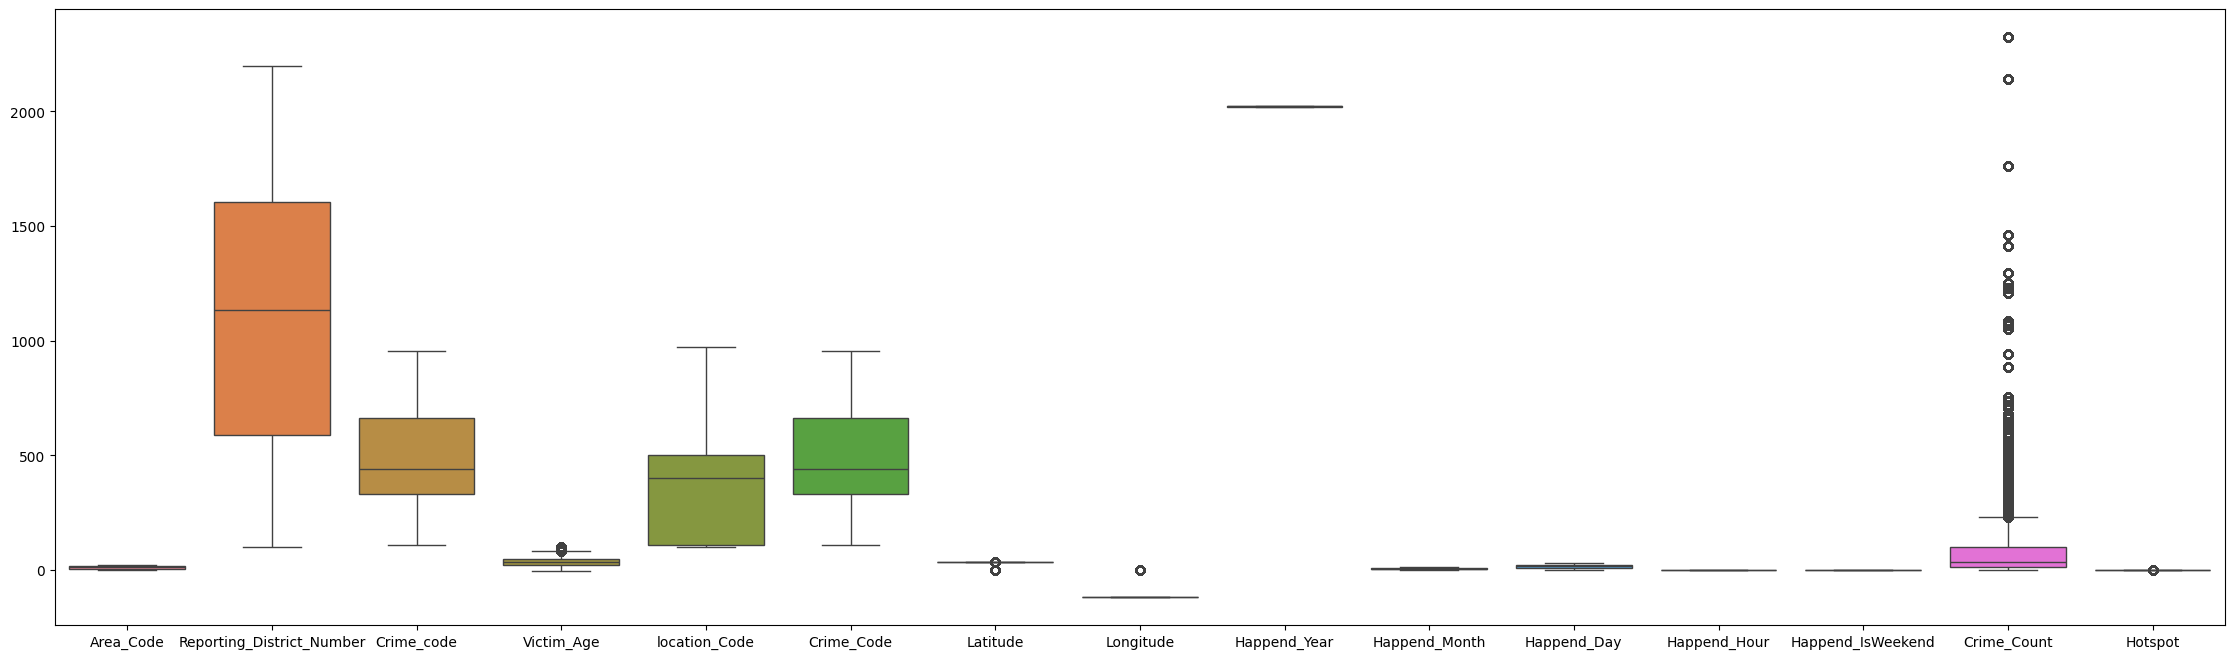

In [40]:
numeric_df = df.select_dtypes(include=['number'])  # Keep only numeric columns
numeric_df = numeric_df.drop(columns=['DR_NO'])  # Drop high-scale columns like 'DR_NO'
plt.figure(figsize=(28, 8))
sns.boxplot(data=numeric_df)

    By analysing this i found that the crime count have some outlier

<Axes: >

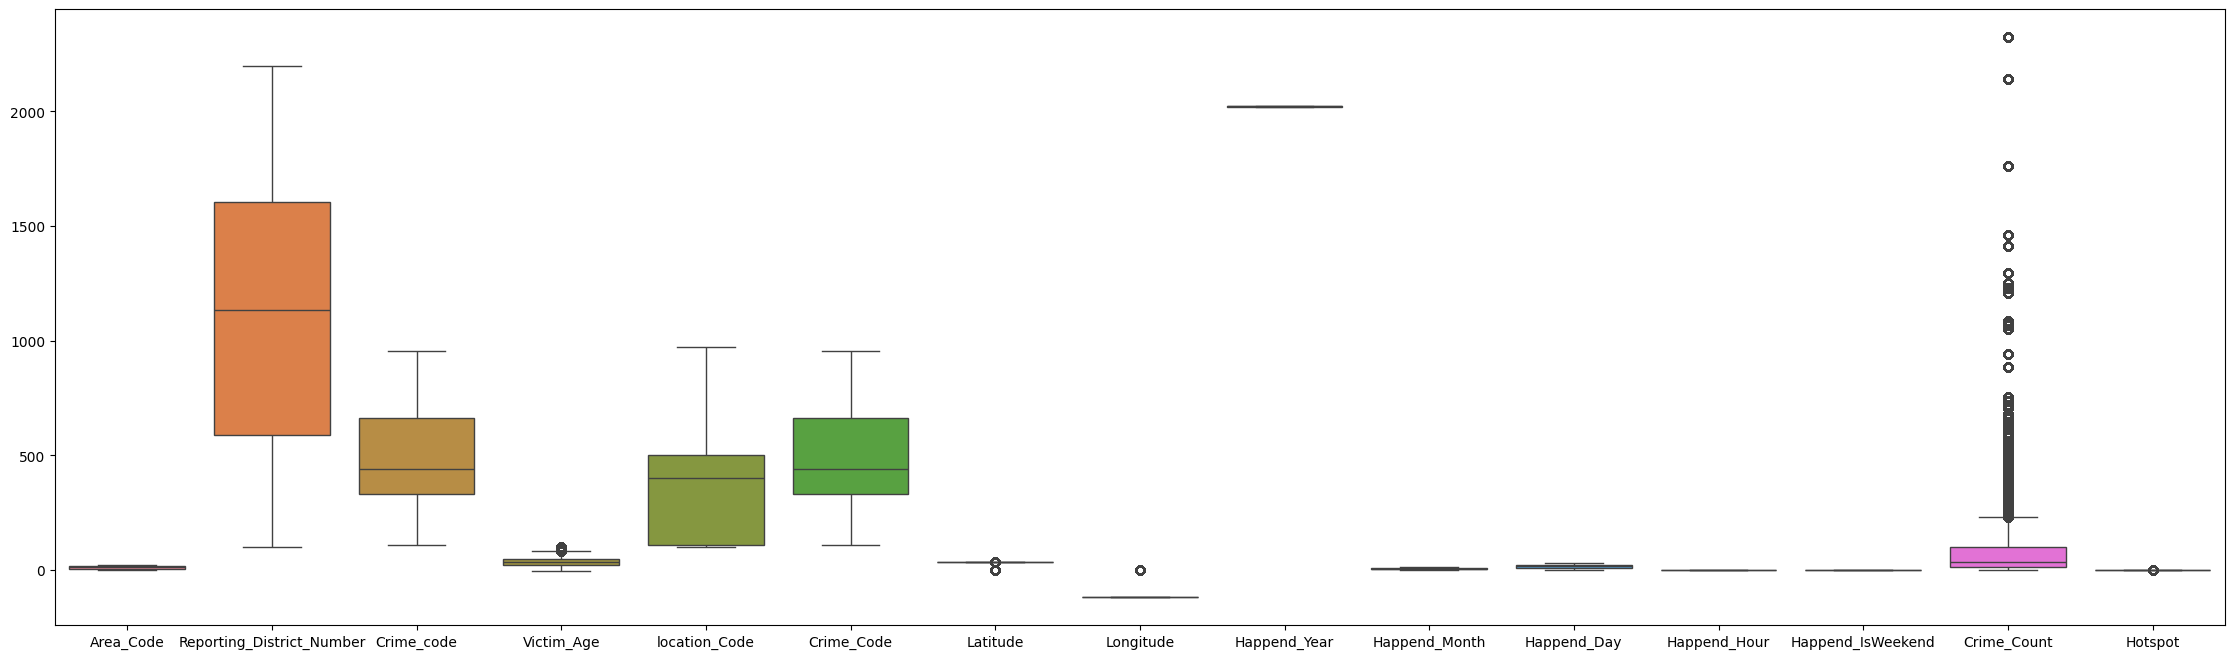

In [41]:
# Set the figure size before creating the box plot
plt.figure(figsize=(28, 8))

# Create the box plot
sns.boxplot(data=numeric_df)


In [42]:
#removes outliers from the dataset
numerical_cols = ['Crime_Count']
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    Handled the outlier with IQR

In [43]:
# df.skew()

# **Visualization**

In [44]:
df.head(5)

,DR_NO,Date_Reported,Date_Occurred,Time_Occurred,Area_Code,Area_Name,Reporting_District_Number,Crime_code,Crime_Type,Victim_Age,...,Longitude,Status_of_Case,Happend_Year,Happend_Month,Happend_Day,Happend_Hour,Happend_DayOfWeek,Happend_IsWeekend,Crime_Count,Hotspot
0,190326475,2020-03-01,03/01/2020 12:00:00 AM,21:30:00,7,Wilshire,784,510,VEHICLE - STOLEN,0,...,-118.3506,Arrested - Adult,2020,3,1,0,Sunday,1,53,1
2,200320258,2020-11-11,11/04/2020 12:00:00 AM,17:00:00,3,Southwest,356,480,BIKE - STOLEN,19,...,-118.3002,Investigation Continued,2020,11,11,0,Wednesday,0,74,1
4,200200759,2020-07-07,07/07/2020 12:00:00 AM,13:40:00,2,Rampart,265,648,ARSON,0,...,-118.2788,Investigation Continued,2020,7,7,0,Tuesday,0,2,0
5,200406391,2020-03-02,03/01/2020 12:00:00 AM,14:30:00,4,Hollenbeck,407,310,BURGLARY,27,...,-118.1877,Investigation Continued,2020,3,2,0,Monday,0,114,1
7,200606074,2020-02-12,02/07/2020 12:00:00 AM,16:15:00,6,Hollywood,646,805,PIMPING,23,...,-118.3370,Arrested - Adult,2020,2,12,0,Wednesday,0,28,1


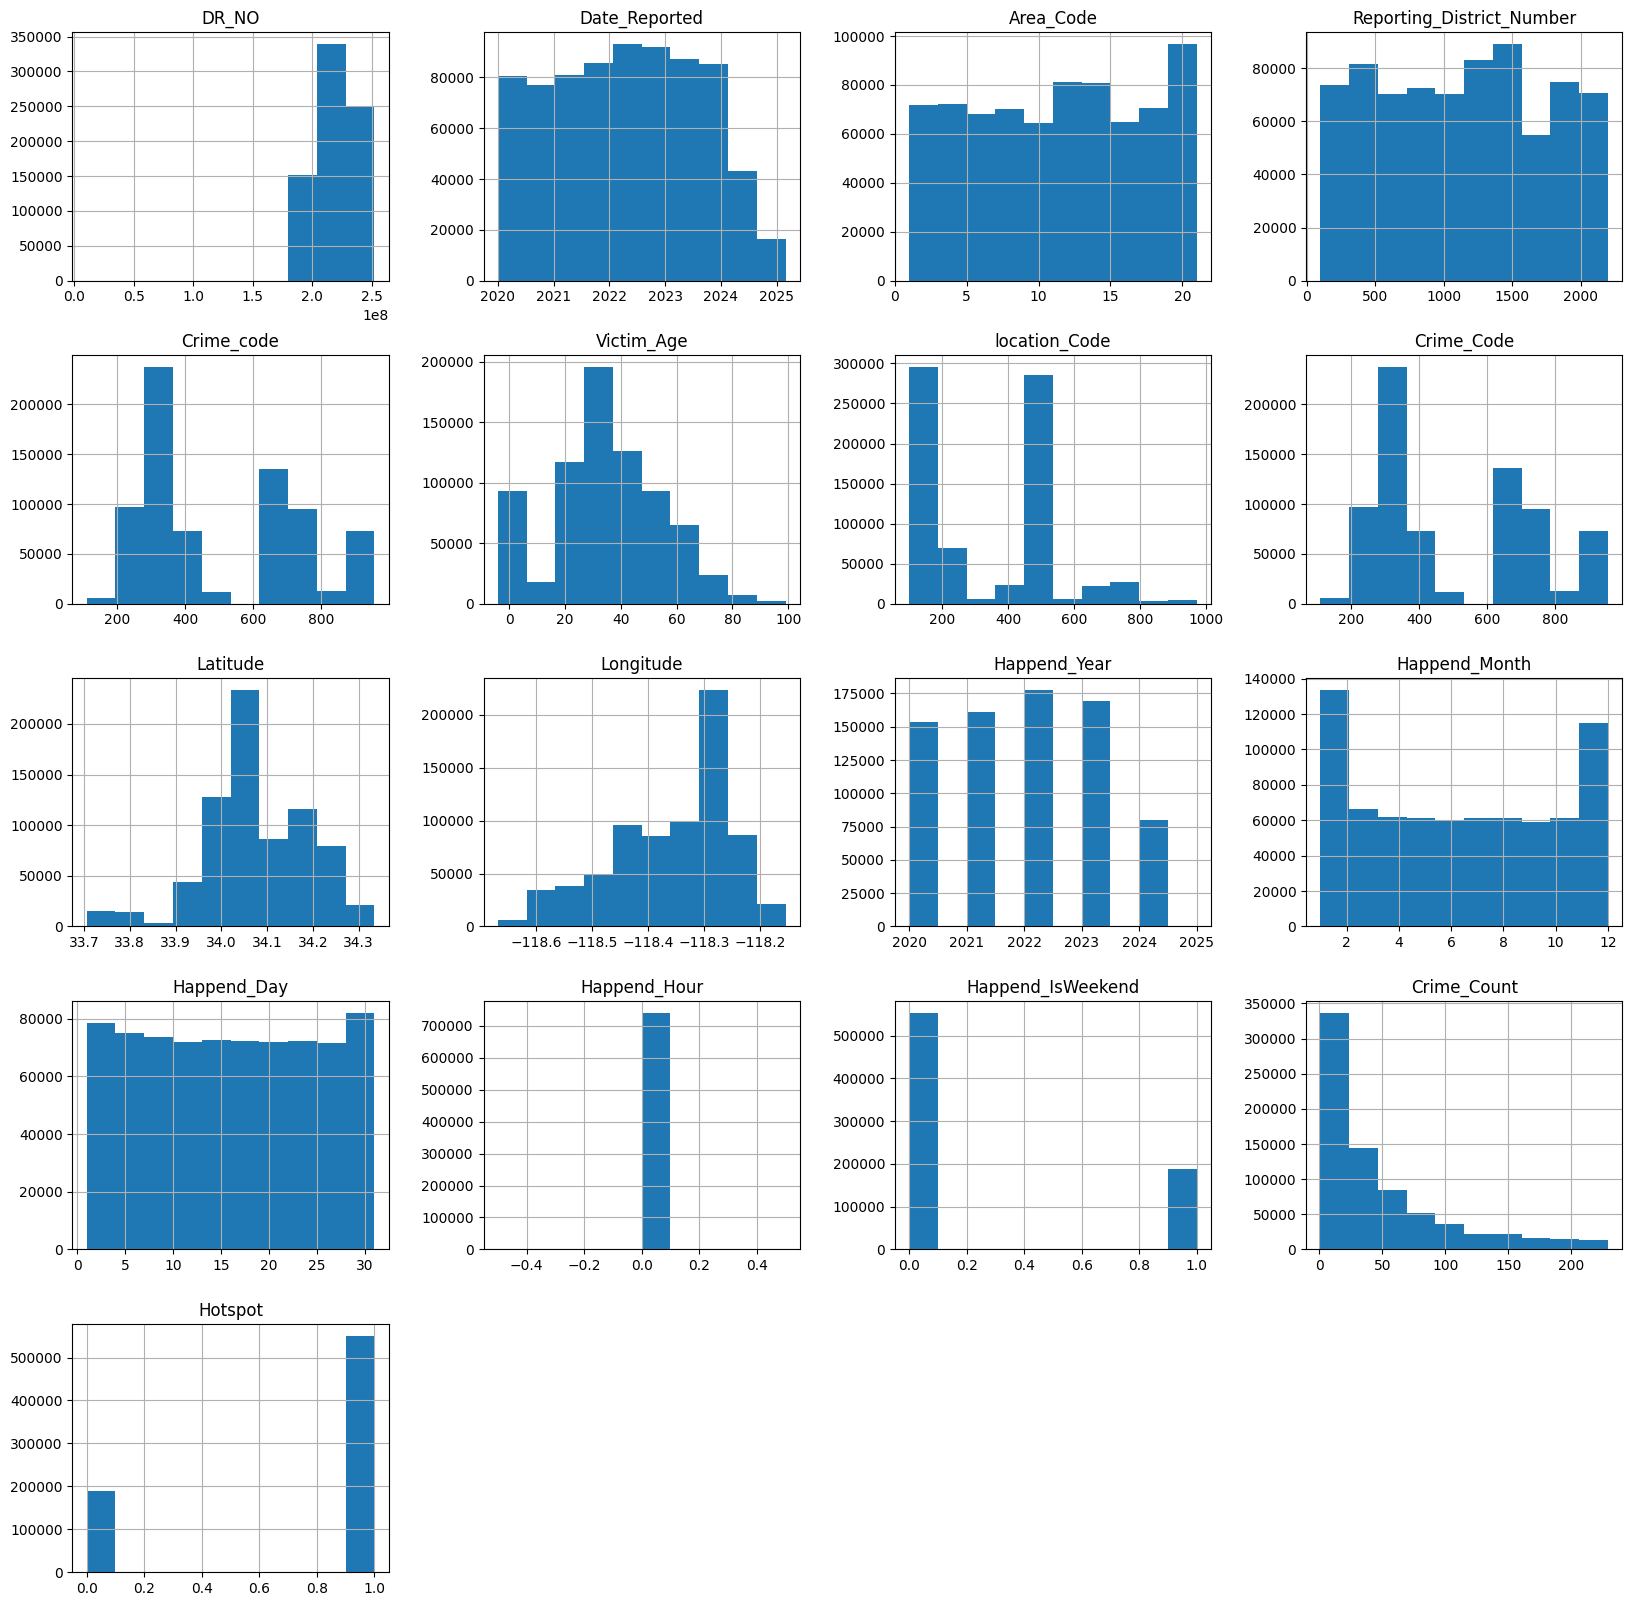

In [45]:
#draw histplot of the data set
df.hist(figsize=(20, 20))
plt.show()

    Drawn a histplot for knowing the distriburion types

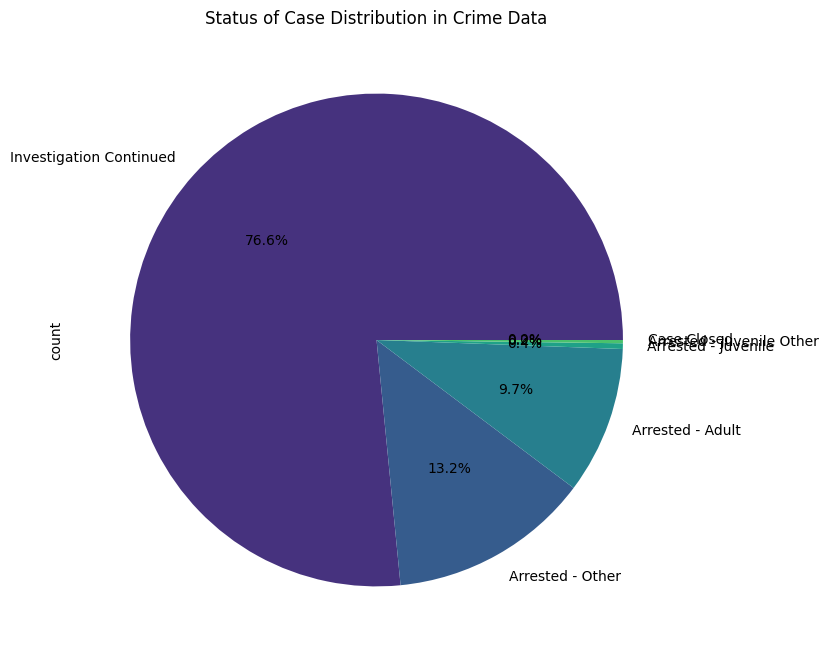

In [46]:
#pie chart of status of case
plt.figure(figsize=(10, 8))
df["Status_of_Case"].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette("viridis"))
plt.title("Status of Case Distribution in Crime Data")
plt.ylabel('count')
plt.show()

    A pie chart drawn for infortion retreving the status of case in crime data

<ipython-input-47-abec18665669>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="Happend_Month", y="Crime_Count", data=df, estimator="sum", ci=None, color="blue")


Text(0.5, 0, 'Month')

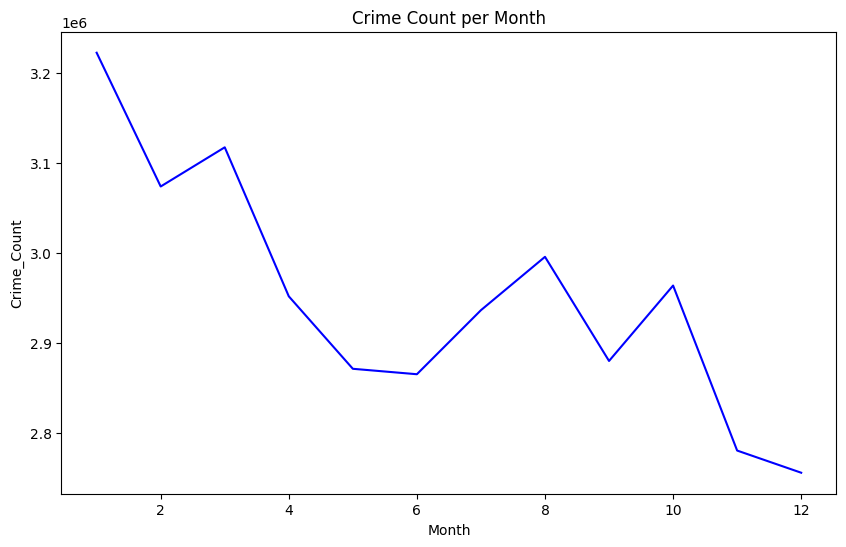

In [47]:
#line chart of crime happrend per month
plt.figure(figsize=(10, 6))
sns.lineplot(x="Happend_Month", y="Crime_Count", data=df, estimator="sum", ci=None, color="blue")
plt.title("Crime Count per Month")
plt.xlabel("Month")

    A line chart drawn for infortion retreving the crime count per month

<ipython-input-48-45dfbb4eecec>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Victim_Racial_Stage"], palette="coolwarm")


Text(0, 0.5, 'Count')

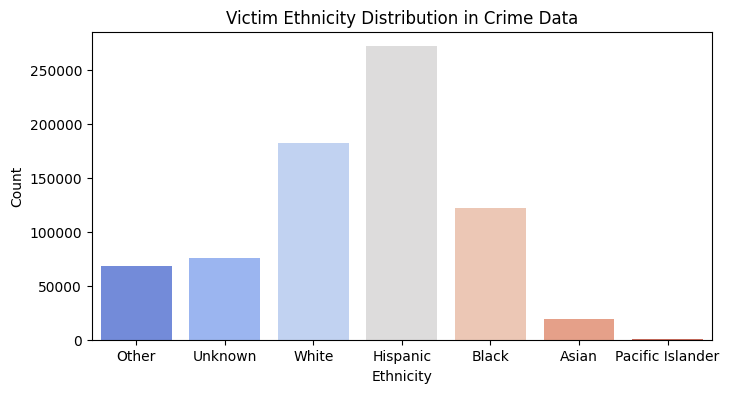

In [48]:
#barcahrt of victim racial stage
plt.figure(figsize=(8, 4))
sns.countplot(x=df["Victim_Racial_Stage"], palette="coolwarm")
plt.title("Victim Ethnicity Distribution in Crime Data")
plt.xlabel("Ethnicity")
plt.ylabel("Count")

    A chart drawn for seeing the distribution of victim racial status with crime data


<ipython-input-49-02e3ecec5fa8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df["Crime_Type"], order=df["Crime_Type"].value_counts().index, palette="viridis")


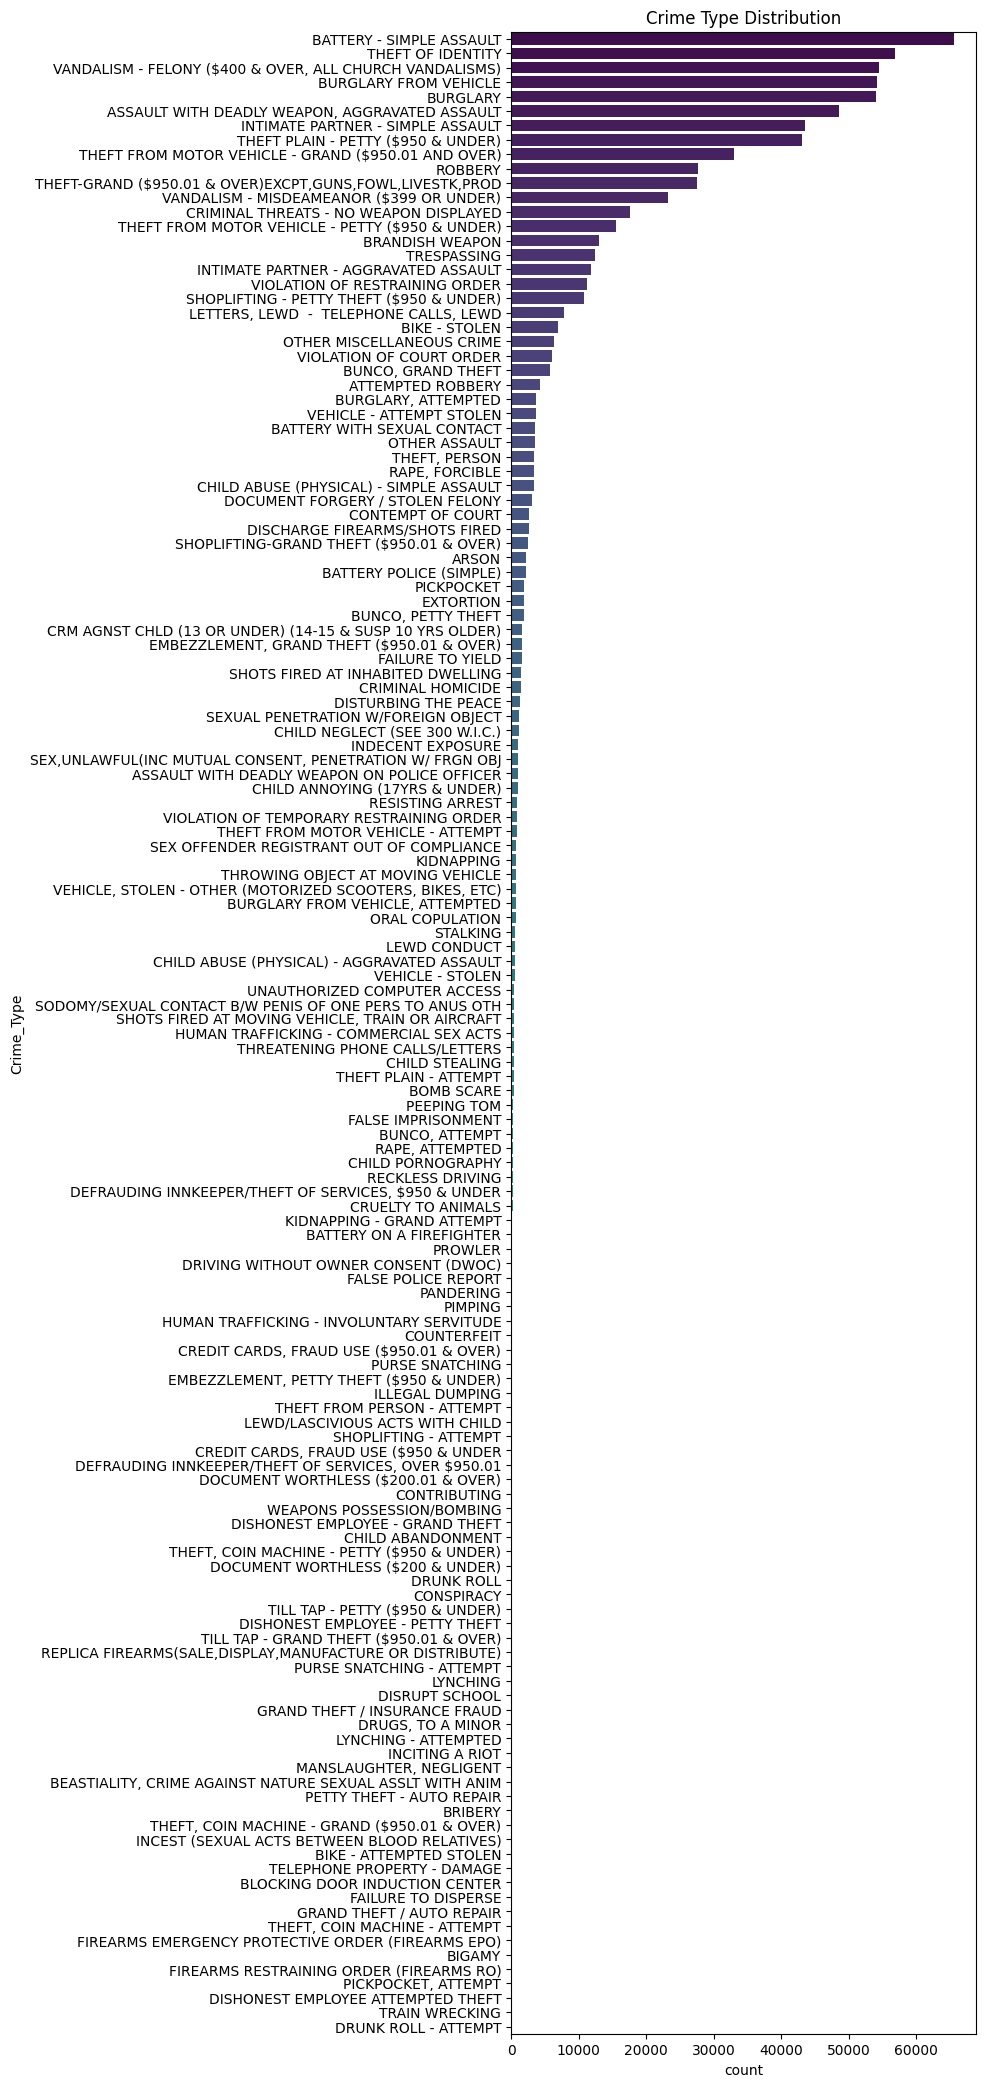

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

#heck Crime Distribution by Location
plt.figure(figsize=(6, 26))
sns.countplot(y=df["Crime_Type"], order=df["Crime_Type"].value_counts().index, palette="viridis")
plt.title("Crime Type Distribution")
plt.show()


    Daigram giving the information of crime type

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 740868 entries, 0 to 839397
Data columns (total 29 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   DR_NO                      740868 non-null  int64         
 1   Date_Reported              740868 non-null  datetime64[ns]
 2   Date_Occurred              740868 non-null  object        
 3   Time_Occurred              723785 non-null  object        
 4   Area_Code                  740868 non-null  int64         
 5   Area_Name                  740868 non-null  object        
 6   Reporting_District_Number  740868 non-null  int64         
 7   Crime_code                 740868 non-null  int64         
 8   Crime_Type                 740868 non-null  object        
 9   Victim_Age                 740868 non-null  int64         
 10  Victim_Sex                 740868 non-null  object        
 11  Victim_Racial_Stage        740868 non-null  object       

In [51]:
df

,DR_NO,Date_Reported,Date_Occurred,Time_Occurred,Area_Code,Area_Name,Reporting_District_Number,Crime_code,Crime_Type,Victim_Age,...,Longitude,Status_of_Case,Happend_Year,Happend_Month,Happend_Day,Happend_Hour,Happend_DayOfWeek,Happend_IsWeekend,Crime_Count,Hotspot
0,190326475,2020-03-01,03/01/2020 12:00:00 AM,21:30:00,7,Wilshire,784,510,VEHICLE - STOLEN,0,...,-118.3506,Arrested - Adult,2020,3,1,0,Sunday,1,53,1
2,200320258,2020-11-11,11/04/2020 12:00:00 AM,17:00:00,3,Southwest,356,480,BIKE - STOLEN,19,...,-118.3002,Investigation Continued,2020,11,11,0,Wednesday,0,74,1
4,200200759,2020-07-07,07/07/2020 12:00:00 AM,13:40:00,2,Rampart,265,648,ARSON,0,...,-118.2788,Investigation Continued,2020,7,7,0,Tuesday,0,2,0
5,200406391,2020-03-02,03/01/2020 12:00:00 AM,14:30:00,4,Hollenbeck,407,310,BURGLARY,27,...,-118.1877,Investigation Continued,2020,3,2,0,Monday,0,114,1
7,200606074,2020-02-12,02/07/2020 12:00:00 AM,16:15:00,6,Hollywood,646,805,PIMPING,23,...,-118.3370,Arrested - Adult,2020,2,12,0,Wednesday,0,28,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839393,250304031,2025-01-07,01/02/2025 12:00:00 AM,18:32:00,3,Southwest,312,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),24,...,-118.3549,Investigation Continued,2025,1,7,0,Tuesday,0,71,1
839394,251004092,2025-01-25,01/24/2025 12:00:00 AM,12:40:00,10,West Valley,1008,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,68,...,-118.4837,Investigation Continued,2025,1,25,0,Saturday,1,116,1
839395,251704066,2025-01-17,01/17/2025 12:00:00 AM,16:00:00,17,Devonshire,1774,624,BATTERY - SIMPLE ASSAULT,17,...,-118.5233,Investigation Continued,2025,1,17,0,Friday,0,15,1
839396,252104053,2025-01-19,01/17/2025 12:00:00 AM,15:30:00,21,Topanga,2114,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",0,...,-118.6103,Investigation Continued,2025,1,19,0,Sunday,1,21,1


In [53]:
df.head(5)

,DR_NO,Date_Reported,Date_Occurred,Time_Occurred,Area_Code,Area_Name,Reporting_District_Number,Crime_code,Crime_Type,Victim_Age,...,Longitude,Status_of_Case,Happend_Year,Happend_Month,Happend_Day,Happend_Hour,Happend_DayOfWeek,Happend_IsWeekend,Crime_Count,Hotspot
0,190326475,2020-03-01,03/01/2020 12:00:00 AM,21:30:00,7,Wilshire,784,510,VEHICLE - STOLEN,0,...,-118.3506,Arrested - Adult,2020,3,1,0,Sunday,1,53,1
2,200320258,2020-11-11,11/04/2020 12:00:00 AM,17:00:00,3,Southwest,356,480,BIKE - STOLEN,19,...,-118.3002,Investigation Continued,2020,11,11,0,Wednesday,0,74,1
4,200200759,2020-07-07,07/07/2020 12:00:00 AM,13:40:00,2,Rampart,265,648,ARSON,0,...,-118.2788,Investigation Continued,2020,7,7,0,Tuesday,0,2,0
5,200406391,2020-03-02,03/01/2020 12:00:00 AM,14:30:00,4,Hollenbeck,407,310,BURGLARY,27,...,-118.1877,Investigation Continued,2020,3,2,0,Monday,0,114,1
7,200606074,2020-02-12,02/07/2020 12:00:00 AM,16:15:00,6,Hollywood,646,805,PIMPING,23,...,-118.3370,Arrested - Adult,2020,2,12,0,Wednesday,0,28,1


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 740868 entries, 0 to 839397
Data columns (total 29 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   DR_NO                      740868 non-null  int64         
 1   Date_Reported              740868 non-null  datetime64[ns]
 2   Date_Occurred              740868 non-null  object        
 3   Time_Occurred              723785 non-null  object        
 4   Area_Code                  740868 non-null  int64         
 5   Area_Name                  740868 non-null  object        
 6   Reporting_District_Number  740868 non-null  int64         
 7   Crime_code                 740868 non-null  int64         
 8   Crime_Type                 740868 non-null  object        
 9   Victim_Age                 740868 non-null  int64         
 10  Victim_Sex                 740868 non-null  object        
 11  Victim_Racial_Stage        740868 non-null  object       

    checking the info of the data just for examine them

# **Encoding**

In [56]:
df

,DR_NO,Date_Reported,Date_Occurred,Time_Occurred,Area_Code,Area_Name,Reporting_District_Number,Crime_code,Crime_Type,Victim_Age,...,Longitude,Status_of_Case,Happend_Year,Happend_Month,Happend_Day,Happend_Hour,Happend_DayOfWeek,Happend_IsWeekend,Crime_Count,Hotspot
0,190326475,2020-03-01,03/01/2020 12:00:00 AM,21:30:00,7,Wilshire,784,510,VEHICLE - STOLEN,0,...,-118.3506,Arrested - Adult,2020,3,1,0,Sunday,1,53,1
2,200320258,2020-11-11,11/04/2020 12:00:00 AM,17:00:00,3,Southwest,356,480,BIKE - STOLEN,19,...,-118.3002,Investigation Continued,2020,11,11,0,Wednesday,0,74,1
4,200200759,2020-07-07,07/07/2020 12:00:00 AM,13:40:00,2,Rampart,265,648,ARSON,0,...,-118.2788,Investigation Continued,2020,7,7,0,Tuesday,0,2,0
5,200406391,2020-03-02,03/01/2020 12:00:00 AM,14:30:00,4,Hollenbeck,407,310,BURGLARY,27,...,-118.1877,Investigation Continued,2020,3,2,0,Monday,0,114,1
7,200606074,2020-02-12,02/07/2020 12:00:00 AM,16:15:00,6,Hollywood,646,805,PIMPING,23,...,-118.3370,Arrested - Adult,2020,2,12,0,Wednesday,0,28,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839393,250304031,2025-01-07,01/02/2025 12:00:00 AM,18:32:00,3,Southwest,312,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),24,...,-118.3549,Investigation Continued,2025,1,7,0,Tuesday,0,71,1
839394,251004092,2025-01-25,01/24/2025 12:00:00 AM,12:40:00,10,West Valley,1008,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,68,...,-118.4837,Investigation Continued,2025,1,25,0,Saturday,1,116,1
839395,251704066,2025-01-17,01/17/2025 12:00:00 AM,16:00:00,17,Devonshire,1774,624,BATTERY - SIMPLE ASSAULT,17,...,-118.5233,Investigation Continued,2025,1,17,0,Friday,0,15,1
839396,252104053,2025-01-19,01/17/2025 12:00:00 AM,15:30:00,21,Topanga,2114,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",0,...,-118.6103,Investigation Continued,2025,1,19,0,Sunday,1,21,1


In [57]:
#encode the object type into int or float
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
categorical_columns = ['Victim_Sex', 'Victim_Racial_Stage', 'Area_type', 'Status_of_Case','Time_Occurred','Date_Reported','Date_Occurred','Happend_DayOfWeek']

for col in categorical_columns:
  df[col] = encoder.fit_transform(df[col].astype(str))

<ipython-input-57-b41bb92c51ca>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = encoder.fit_transform(df[col].astype(str))
<ipython-input-57-b41bb92c51ca>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = encoder.fit_transform(df[col].astype(str))
<ipython-input-57-b41bb92c51ca>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

    label encoded these columns because its all are in categorical, so its changed into int/float by label encoding

In [58]:
df

,DR_NO,Date_Reported,Date_Occurred,Time_Occurred,Area_Code,Area_Name,Reporting_District_Number,Crime_code,Crime_Type,Victim_Age,...,Longitude,Status_of_Case,Happend_Year,Happend_Month,Happend_Day,Happend_Hour,Happend_DayOfWeek,Happend_IsWeekend,Crime_Count,Hotspot
0,190326475,60,339,1150,7,Wilshire,784,510,VEHICLE - STOLEN,0,...,-118.3506,0,2020,3,1,0,3,1,53,1
2,200320258,315,1579,880,3,Southwest,356,480,BIKE - STOLEN,19,...,-118.3002,5,2020,11,11,0,6,0,74,1
4,200200759,188,979,680,2,Rampart,265,648,ARSON,0,...,-118.2788,5,2020,7,7,0,5,0,2,0
5,200406391,61,339,730,4,Hollenbeck,407,310,BURGLARY,27,...,-118.1877,5,2020,3,2,0,1,0,114,1
7,200606074,42,208,835,6,Hollywood,646,805,PIMPING,23,...,-118.3370,0,2020,2,12,0,6,0,28,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839393,250304031,1833,11,972,3,Southwest,312,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),24,...,-118.3549,5,2025,1,7,0,5,0,71,1
839394,251004092,1846,132,620,10,West Valley,1008,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,68,...,-118.4837,5,2025,1,25,0,2,1,116,1
839395,251704066,1840,93,820,17,Devonshire,1774,624,BATTERY - SIMPLE ASSAULT,17,...,-118.5233,5,2025,1,17,0,0,0,15,1
839396,252104053,1841,93,790,21,Topanga,2114,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",0,...,-118.6103,5,2025,1,19,0,3,1,21,1


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 740868 entries, 0 to 839397
Data columns (total 29 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   DR_NO                      740868 non-null  int64  
 1   Date_Reported              740868 non-null  int64  
 2   Date_Occurred              740868 non-null  int64  
 3   Time_Occurred              740868 non-null  int64  
 4   Area_Code                  740868 non-null  int64  
 5   Area_Name                  740868 non-null  object 
 6   Reporting_District_Number  740868 non-null  int64  
 7   Crime_code                 740868 non-null  int64  
 8   Crime_Type                 740868 non-null  object 
 9   Victim_Age                 740868 non-null  int64  
 10  Victim_Sex                 740868 non-null  int64  
 11  Victim_Racial_Stage        740868 non-null  int64  
 12  location_Code              740868 non-null  float64
 13  Area_type                  740868 

In [60]:
#dropping columns because its have its encoded columns
df = df.drop(columns = ['Area_Name','Crime_Type','Location','Status_','Status','Happend_Hour'])
#

    dropped this columns because these columns already have their encoded column present in the dataset

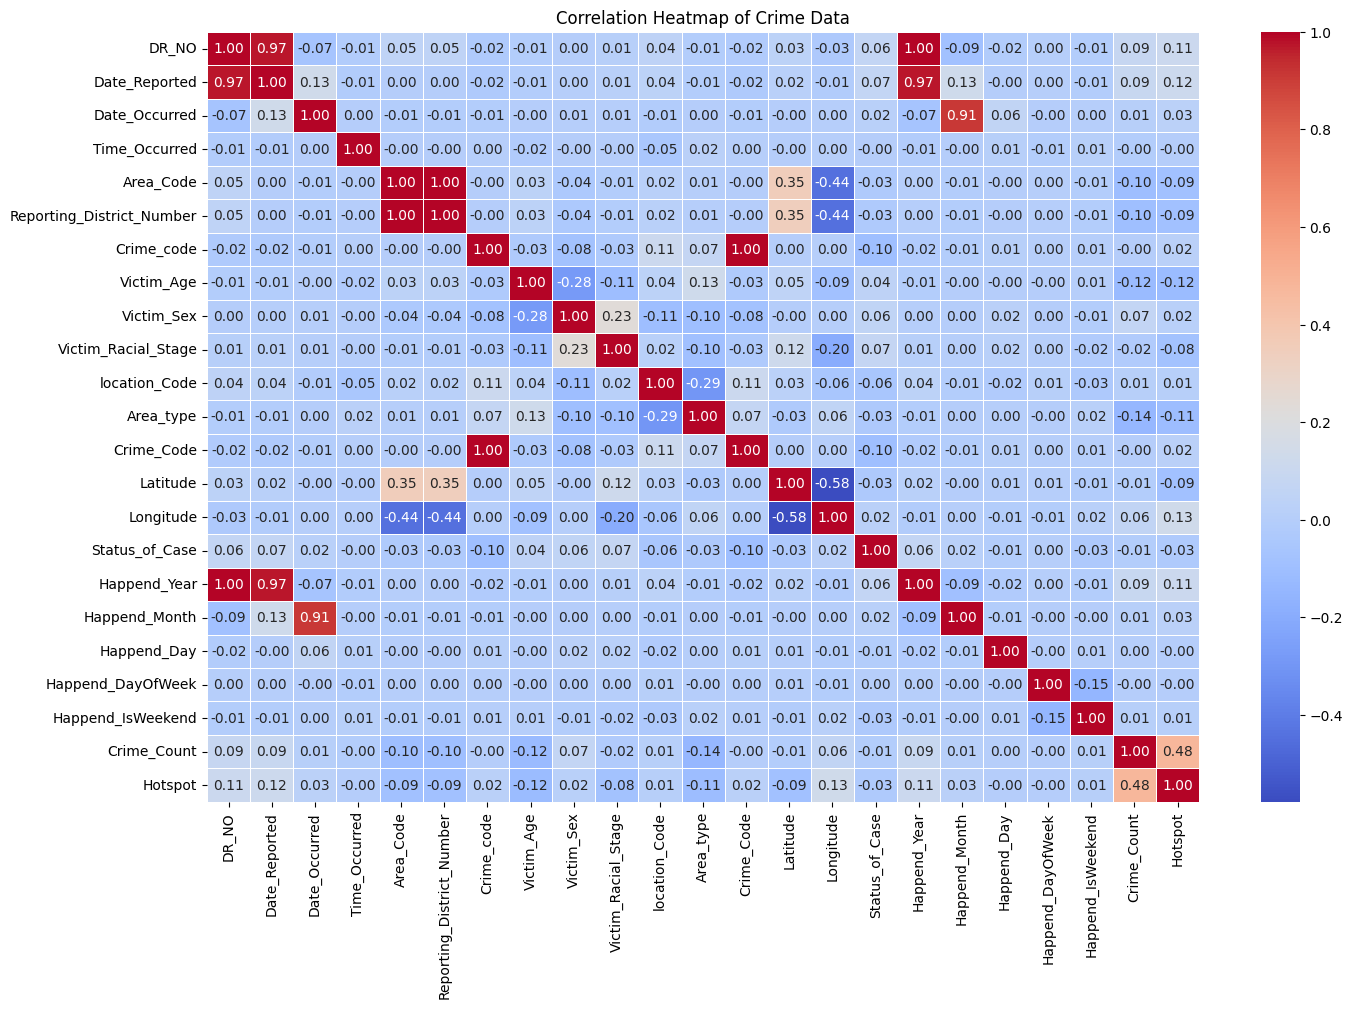

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Crime Data")
plt.show()


    drawn a heatmap of the dataset to understanding the correlations between  of the features in the dataset    

# ***Model Training***

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Select features
features = ["Latitude", "Longitude","Happend_Month","Happend_Day","Happend_IsWeekend"]
target = "Hotspot"

# Encode categorical variables
label_encoder = LabelEncoder()
df["Happend_DayOfWeek"] = label_encoder.fit_transform(df["Happend_DayOfWeek"])

# Split dataset into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)


    training the model

    

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

# Initialize the Logistic Regression model
# By default, it uses an L2 (Ridge) regularization to prevent overfitting
log_reg = LogisticRegression()

# Train (fit) the model using the training dataset
# X_train contains the input features, and y_train contains the corresponding labels
log_reg.fit(X_train, y_train)

# Use the trained model to make predictions on the test dataset (X_test)
y_pred_log = log_reg.predict(X_test)

# Display a detailed classification report showing precision, recall, and F1-score
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_log))

# Show the confusion matrix, which helps visualize how well the model performed
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))

# Compute the model's accuracy by comparing predictions with actual labels
accuracy_log = accuracy_score(y_test, y_pred_log)

# Print only the accuracy, formatted to two decimal places for better readability
print(f"Logistic Regression Accuracy: {accuracy_log:.2f}")




Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00     38218
           1       0.74      1.00      0.85    109956

    accuracy                           0.74    148174
   macro avg       0.37      0.50      0.43    148174
weighted avg       0.55      0.74      0.63    148174

Confusion Matrix:
 [[     0  38218]
 [     0 109956]]
Logistic Regression Accuracy: 0.74


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


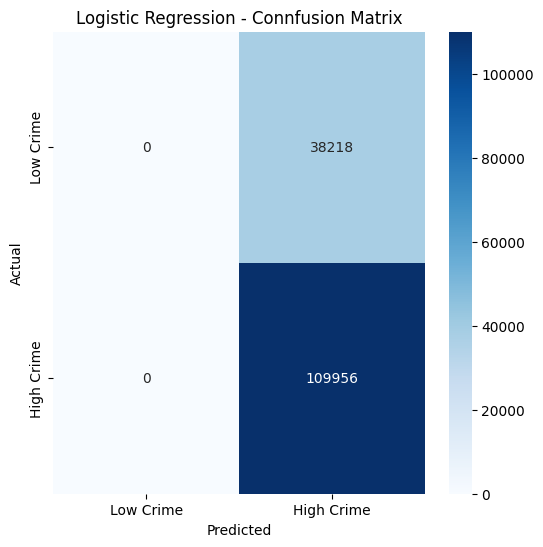

In [64]:
#plot a confusion metrix for logistic regression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Plot Confusion Matrix for Logistic Regression
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt="d", cmap="Blues", xticklabels=["Low Crime","High Crime"], yticklabels=["Low Crime","High Crime"])
plt.title('Logistic Regression - Connfusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [65]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model with 100 decision trees (estimators)
# The random_state ensures reproducibility of results
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model using the training dataset (X_train as features, y_train as target labels)
rf_model.fit(X_train, y_train)

# Make predictions on the test dataset (X_test)
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model's performance by printing a classification report and confusion matrix
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# Calculate the model's accuracy on the test set
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Display only the accuracy with two decimal places for clarity
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")



Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.56      0.68     38218
           1       0.86      0.97      0.91    109956

    accuracy                           0.86    148174
   macro avg       0.86      0.76      0.80    148174
weighted avg       0.86      0.86      0.85    148174

Confusion Matrix:
 [[ 21375  16843]
 [  3365 106591]]
Random Forest Accuracy: 0.86


As we trained the model 2 classifier such as logistic regression and randomforest classifier and we got accuracy than logistic regression in randomforest classifier so i took that as our model

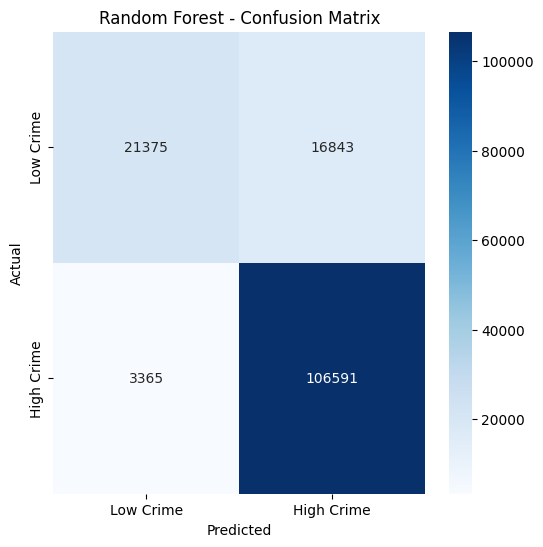

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Plot Confusion Matrix for Random Forest
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Blues", xticklabels=["Low Crime","High Crime"], yticklabels=["Low Crime","High Crime"])
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()











(a) Model Accuracy

  High TP & TN → Good model performance.

  High FP or FN → Indicates possible errors.


(b) False Positives (FP) – Overprediction of Crime Hotspots

If FP is high, the model wrongly predicts low-crime areas as crime hotspots.

Effect: Wastes police resources, leading to unnecessary alerts.


(c) False Negatives (FN) – Missed Crime Hotspots

If FN is high, the model fails to detect actual crime hotspots.

Effect:  Dangerous! Leads to under-policing of high-risk areas.

Solution: Improve recall using hyperparameter tuning or feature engineering.

    Final Documentation
    